# Introduction

> In this project, we will look at GAIN & LIFT chart - two measures that are used for measuring the benifits of using the logistic regression model and are used in business context such as target marketing, customer churn rate, customer conversions rate.

> In target marketing or marketing campaigns, customers' responses to campaign are usually very low, somtimes less than 1%. Another example oof such low conversions if response to advertisement on the internet such as google adwords and mobile advertisements.

> The organization incurs cost for each customer contact and hence would like to minimize the cost of marketing campaign and at the same time achieve the desired response level from the customers.

> Formula for Gain and Lift is as below:

>    GAIN = (Cumulative number of positive observations upto decile i)/(Total number of positive                  observations in the data)

>    LIFT = (Cumulative number of positive observations upto decile i using Logistic                              model)/(Cumulative number of positive observations upto decile i based on random model)

> Apart from this we will also create decision tree graph using pydotplus and graphVIZ API


> Dataset is taken from UCI's ML repository and it is a part of the book Machine learning using python by U Dinesh kumar

# Feature description

1. **age** - Age of the client
2. **job** - type of job
3. **marital** - marital status
4. **education** - education qualification
5. **default** - customer has credit in default? (yes/no)
6. **balance** - average yearly balance, in euros
7. **housing-loan** - has housing loan?(yes/no)
8. **personal-loan** - has personal loan? (yes/no)
9. **current camoaign** - number of contact performed during this campaign
10. **previos campaign** - number of contact performed before this campaign
11. **subscribed(Target)** - subscribed or not for term deposit? (yes/no)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from IPython.display import Image
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, auc, confusion_matrix, accuracy_score
from sklearn.utils import resample, shuffle


# matplotlib defaults
plt.style.use("seaborn-darkgrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bank-dataset/bank.csv


In [2]:
# download and install pydotplus
!pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 KB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=c4b799936602edc2e7220ecf03a086cea6f6fcda43fc3d3e5884289393be3b28
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


In [3]:
import pydotplus as pdot

In [4]:
df = pd.read_csv("/kaggle/input/bank-dataset/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


# Basic data analysis

In [5]:
df.info()
print("*******************************************************")
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB
*******************************************************
(4521, 11)


<AxesSubplot:title={'center':'Count of subscribers for term deposit'}, xlabel='subscribed', ylabel='Count of users'>

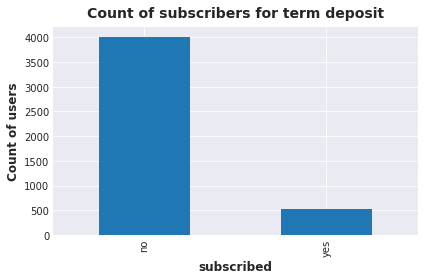

In [6]:
# check class balance.
df.subscribed.value_counts().plot(kind='bar', xlabel='subscribed',
                                 ylabel='Count of users',
                                 title='Count of subscribers for term deposit')

> Classes are highly imbalanced as it is and case of targeted marketing. in such cases conversions are always low. in some marketing campaigns customers conversions are below 1%.

In [7]:
num_cols = [col for col in df.columns if df[col].dtype == 'int64']
print(num_cols)
print("**********************************************************")
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
print(cat_cols)

['age', 'balance', 'current-campaign', 'previous-campaign']
**********************************************************
['job', 'marital', 'education', 'default', 'housing-loan', 'personal-loan', 'subscribed']


In [8]:
for col in cat_cols:
    vc=df[col].value_counts()
    print("for cat feature {}, values are: \n{}".format(col,vc))
    print("******************************************")

for cat feature job, values are: 
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
******************************************
for cat feature marital, values are: 
married     2797
single      1196
divorced     528
Name: marital, dtype: int64
******************************************
for cat feature education, values are: 
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64
******************************************
for cat feature default, values are: 
no     4445
yes      76
Name: default, dtype: int64
******************************************
for cat feature housing-loan, values are: 
yes    2559
no     1962
Name: housing-loan, dtype: int64
******************************************
for cat feature personal-l

> more than 50% of customers are having housing loans

<Figure size 432x432 with 0 Axes>

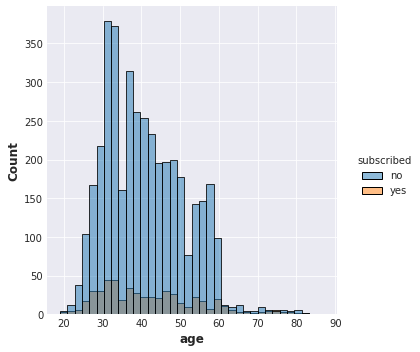

<Figure size 432x432 with 0 Axes>

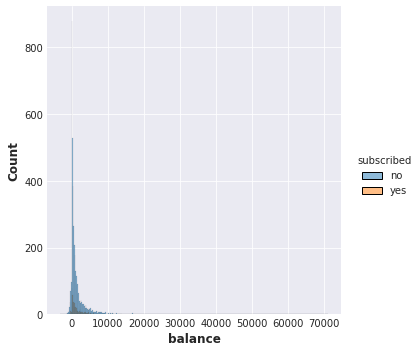

<Figure size 432x432 with 0 Axes>

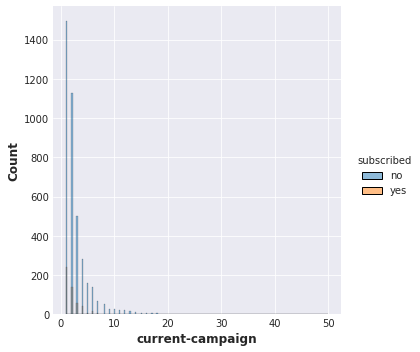

<Figure size 432x432 with 0 Axes>

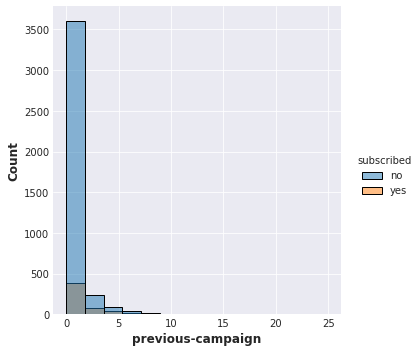

In [9]:
# see the distributions of num features
for idx, col in enumerate(num_cols):
    plt.figure(idx, figsize=(6,6))
    sns.displot(x=df[col], kde=False, hue=df['subscribed'])
    plt.show()

> all age groups are imporatant as showing in graph, we will keep all the features 

> current- previous camplaign contacts shoiwng that approx 3-4 times contacted customers are being converted to subscribe for term deposite.

> balance feature has some outliers 

# Logistic regression model

In [10]:
# pre-process the data and build logistic regresison model
X = df.drop('subscribed', axis=1)
y = df.subscribed

# get dummy variables
X = pd.get_dummies(X, 
                   columns=['job','marital','education','default','housing-loan','personal-loan'],
                   drop_first=True)

# encode target columns
y = y.map({'yes': 1,
           'no': 0}
         )

# logit model
X = sm.add_constant(X)

lm = sm.Logit(y,X).fit()
lm.summary2()

Optimization terminated successfully.
         Current function value: 0.335572
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.061     
Dependent Variable:   subscribed       AIC:              3082.2384 
Date:                 2024-05-24 14:57 BIC:              3236.2341 
No. Observations:     4521             Log-Likelihood:   -1517.1   
Df Model:             23               LL-Null:          -1615.5   
Df Residuals:         4497             LLR p-value:      1.4866e-29
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const               -1.7573   0.3799 -4.6251 0.0000 -2.5019 -1.0126
age                  0.0078   0.0058  1.3395 0.1804 -0.0036  0.0191
balance             -0.0000   0.0000 -0.2236 0.8231 -0.0000  0.0000
current-campaign    -0.0905   0.0238 -3.8042 0.0001 -0.1371 -0.0439
previous-campaign    0.1414   0.0212  6.6569 0.0000  0.0998  0.1830
job_blue-collar     -0.3412   0.2000 -1.7060 0.0880 -0.7331  0.0508
job_entrepreneur    -0.2900   0.3161 -0.9175 0.3589 -0.9096  0.3295
job_housemaid       -0.0166   0.3339 -0.0497 0.9603 -0.6711  0.6379
job_management      -0.0487   0.1984 -0.2455 0.8061 -0.4375  0.3401
job_retired          0.5454   0.2503  2.1794 0.0293  0.0549  1.0360
job_self-employed   -0.2234   0.2895 -0.7715 0.4404 -0.7909  0.3441
job_services        -0.2248   0.2245 -1.0012 0.3167 -0.6648  0.2152
job_student          0.3888   0.3181  1.2223 0.2216 -0.2346  1.0122
job_technician      -0.2101   0.1874 -1.1213 0.2622 -0.5773  0.1571
job_unemployed      -0.3723   0.3336 -1.1162 0.2643 -1.0261  0.2815
job_unknown          0.3193   0.4620  0.6913 0.4894 -0.5861  1.2248
marital_married     -0.4012   0.1440 -2.7857 0.0053 -0.6835 -0.1189
marital_single      -0.0463   0.1676 -0.2763 0.7823 -0.3749  0.2822
education_secondary  0.2128   0.1680  1.2670 0.2052 -0.1164  0.5420
education_tertiary   0.3891   0.1935  2.0103 0.0444  0.0098  0.7684
education_unknown   -0.1956   0.2927 -0.6682 0.5040 -0.7693  0.3781
default_yes          0.2286   0.3670  0.6228 0.5334 -0.4908  0.9479
housing-loan_yes    -0.5355   0.1024 -5.2273 0.0000 -0.7362 -0.3347
personal-loan_yes   -0.7139   0.1689 -4.2268 0.0000 -1.0449 -0.3829
===================================================================

"""

In [11]:
# see the predicted probability
pred_df = pd.DataFrame({'actual': y,
                         'pred_prob': lm.predict(X)
                       })
sorted_df = pred_df.sort_values('pred_prob', ascending=False)
sorted_df.head()

,actual,pred_prob
3682,0,0.873854
97,0,0.825633
1312,1,0.689722
3426,0,0.665803
2070,0,0.658679


> Having unbalanced classes we will not assign predicted 0 or 1. instead try to find prediction accuracy through GAIN-LIFT chart.

# GAIN-LIFT CHART

In [12]:
#calculate counts per decile
num_per_decile = int(len(sorted_df['pred_prob'])/10)
print("Number of observation per decile: ", num_per_decile)

Number of observation per decile:  452


In [13]:
li = [num for num in range(0,4520,452)]
li

[0, 452, 904, 1356, 1808, 2260, 2712, 3164, 3616, 4068]

In [14]:
# assign deciles to each observations
sorted_df['decile'] = 1
sorted_df.iloc[0:452, sorted_df.columns.get_loc('decile')] = 1
sorted_df.iloc[452:904, sorted_df.columns.get_loc('decile')] = 2
sorted_df.iloc[904:1356, sorted_df.columns.get_loc('decile')] = 3
sorted_df.iloc[1356:1808, sorted_df.columns.get_loc('decile')] = 4
sorted_df.iloc[1808:2260, sorted_df.columns.get_loc('decile')] = 5
sorted_df.iloc[2260:2712, sorted_df.columns.get_loc('decile')] = 6
sorted_df.iloc[2712:3164, sorted_df.columns.get_loc('decile')] = 7
sorted_df.iloc[3164:3616, sorted_df.columns.get_loc('decile')] = 8
sorted_df.iloc[3616:4068, sorted_df.columns.get_loc('decile')] = 9
sorted_df.iloc[4068:, sorted_df.columns.get_loc('decile')] = 10
sorted_df

,actual,pred_prob,decile
3682,0,0.873854,1
97,0,0.825633,1
1312,1,0.689722,1
3426,0,0.665803,1
2070,0,0.658679,1
...,...,...,...
298,1,0.004662,10
3225,0,0.004216,10
1363,0,0.003857,10
4301,0,0.001309,10


In [15]:
deciles_df = sorted_df.copy()

gain_decile_df = pd.DataFrame(deciles_df.groupby('decile')['actual'].sum().reset_index())
gain_decile_df.columns = ['decile','gain']
gain_decile_df

,decile,gain
0,1,135
1,2,90
2,3,52
3,4,43
4,5,61
5,6,35
6,7,32
7,8,31
8,9,24
9,10,18


In [16]:
gain_decile_df['gain_percentage'] = (100*gain_decile_df['gain'].cumsum()/gain_decile_df['gain'].sum())
gain_decile_df

,decile,gain,gain_percentage
0,1,135,25.911708
1,2,90,43.186180
2,3,52,53.166987
3,4,43,61.420345
4,5,61,73.128599
5,6,35,79.846449
6,7,32,85.988484
7,8,31,91.938580
8,9,24,96.545106
9,10,18,100.000000


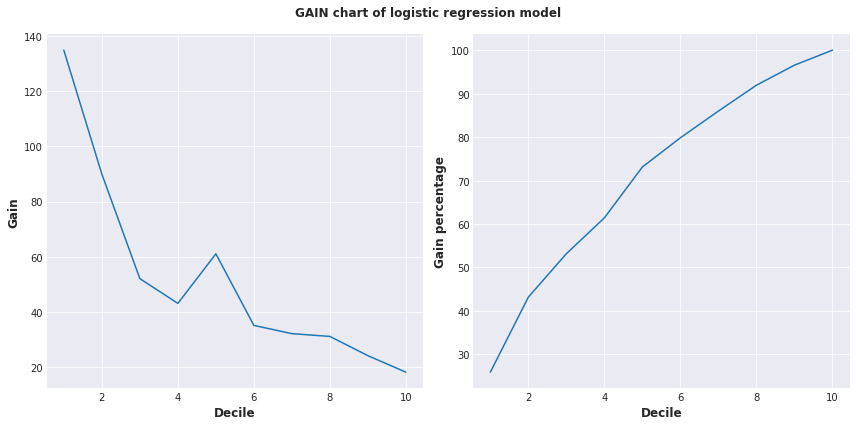

In [17]:
# plot the gain against the decile
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(gain_decile_df['decile'], gain_decile_df['gain'])
plt.xlabel('Decile')
plt.ylabel('Gain')

plt.subplot(1,2,2)
plt.plot(gain_decile_df['decile'], gain_decile_df['gain_percentage'])
plt.xlabel('Decile')
plt.ylabel('Gain percentage')

plt.suptitle('GAIN chart of logistic regression model', weight='bold')
plt.show()

> Inferences can be made as, first 10% of the customers gives almost 120 customers who are going to subscribe for term deposit

> from second, we can notice that by contacting first 60% of the customers we will get 80% of the subscribers

> For business cases where you have imbalanced classes, rather than predicting actual outcome, we can use logistic regression model that predicts probabilistic outcome and than we can measure what percentage of customers are more likely to be converted.

In [18]:
gain_decile_df['Lift'] = (gain_decile_df.gain_percentage/(gain_decile_df.decile*10))
gain_decile_df

,decile,gain,gain_percentage,Lift
0,1,135,25.911708,2.591171
1,2,90,43.186180,2.159309
2,3,52,53.166987,1.772233
3,4,43,61.420345,1.535509
4,5,61,73.128599,1.462572
5,6,35,79.846449,1.330774
6,7,32,85.988484,1.228407
7,8,31,91.938580,1.149232
8,9,24,96.545106,1.072723
9,10,18,100.000000,1.000000


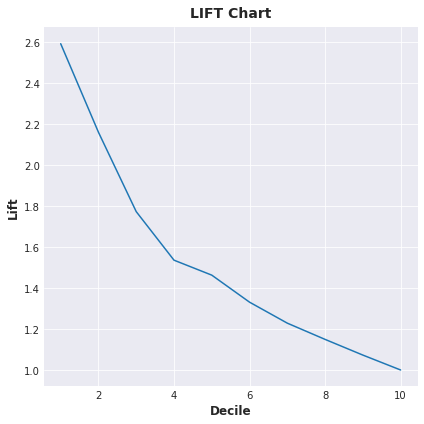

In [19]:
# plot the lift chart
plt.figure(figsize=(6,6))
plt.plot(gain_decile_df['decile'], gain_decile_df['Lift'])
plt.xlabel('Decile')
plt.ylabel('Lift')
plt.title("LIFT Chart")
plt.show()

> Upto 2nd deciles customers are most likely to be subscribers from prediction model.

# Decision tree model with unbalanced classes

**> Experiment no. 1**

> We are builing decision tree classifer without balancing data using gini impurity method

In [20]:
X_n = X.drop('const', axis=1)
y

#devide traina and test data
X_train, X_test, y_train, y_test = train_test_split(X_n,y, test_size=0.20, random_state=42)

#decision tree classifier
tree1 = DecisionTreeClassifier(criterion = 'gini', max_depth=10)
tree1.fit(X_train,y_train)
score = tree1.score(X_test, y_test)
pred_y = tree1.predict(X_test)
accuracy = accuracy_score(y_test,pred_y)
print("Score: ", score)
print("Accuray of model: ", accuracy)

Score:  0.8596685082872928
Accuray of model:  0.8596685082872928


In [21]:
# confusion matrix
def confusion_matri(actual, predicted):
    cm = confusion_matrix(actual, predicted, labels=[1,0])
    tp, fn, fp, tn = cm.ravel()
    #plot confusion matrix
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='.2f', 
                xticklabels =['subscribed','not subscribed'],
                yticklabels =['subscribed','not subscribed'])
    plt.ylabel('True Label')
    plt.xlabel('Predicted lable')
    plt.title("Confusion Matrix")
    plt.show()
    return tn,fp,fn,tp

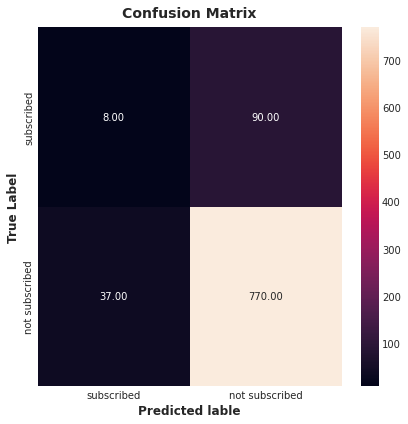

(770, 37, 90, 8)

In [22]:
confusion_matri(y_test, pred_y)

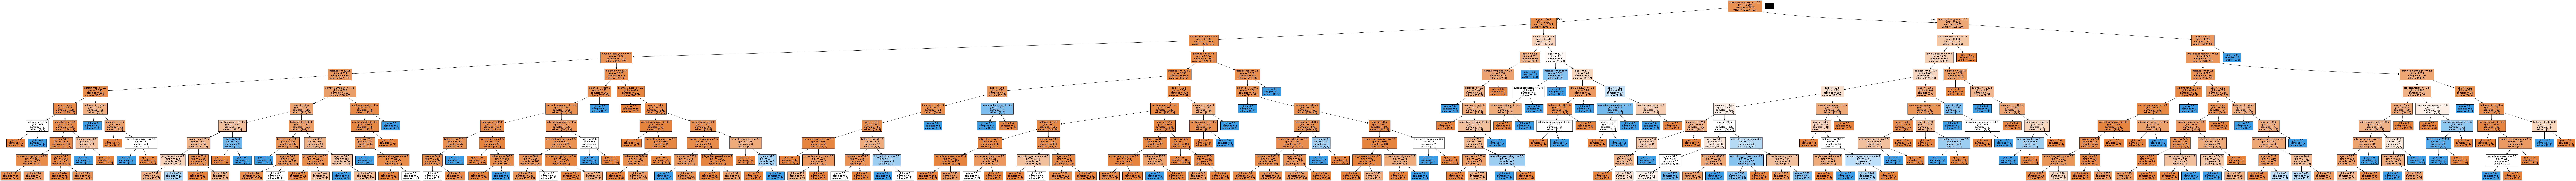

In [23]:
# creating graph of the tree
# export the tree into odt file
export_graphviz(tree1,
               out_file= "tree1_file.odt",
               feature_names=X_n.columns,
               filled=True,
               proportion=False)

# read the create the image file
tree_graph = pdot.graphviz.graph_from_dot_file("tree1_file.odt")
tree_graph.write_jpg("tree1_file.png")
#Render the png file
Image(filename="tree1_file.png")

**> Experiment no. 2**

> We are builing decision tree classifer without balancing data using entropy criteria

In [24]:
#decision tree classifier 2 
tree2 = DecisionTreeClassifier(criterion = 'entropy', max_depth=10)
tree2.fit(X_train,y_train)
score2 = tree2.score(X_test, y_test)
pred_y2 = tree2.predict(X_test)
accuracy2 = accuracy_score(y_test,pred_y)
print("Score 2 : ", score2)
print("Accuray of model 2: ", accuracy2)

Score 2 :  0.8685082872928177
Accuray of model 2:  0.8596685082872928


> Scores are almost the same with gini and entropy criteria

**> Experiment no. 3**

> Using sklearn utils to oversample minority class

In [25]:
# creat full data frame with total observations
d_n = pd.concat([X_n,y], axis=1)

#seperate the yes-subscribed and no-subscribed
df_no = d_n[d_n['subscribed'] == 0]
df_yes = d_n[d_n['subscribed'] == 1]

# upsample teh minority dataframe
df_upsampled = resample(df_yes,
                       replace=True,
                       n_samples=2600)

# concat to create final dataset
final_df = pd.concat([df_no,df_upsampled])

# shuffle the data set
final_df = shuffle(final_df)
final_df['subscribed'].value_counts()

0    4000
1    2600
Name: subscribed, dtype: int64

In [26]:
# Build model using Decision tree clssifier
Xn = final_df.drop('subscribed', axis=1)
yn = final_df.subscribed

# train and test dataset
X_trn, X_tst, y_trn, y_tst = train_test_split(Xn,yn, test_size=0.20, random_state=42)

# Decision tree model
tree3 = DecisionTreeClassifier(criterion='gini', max_depth=14, random_state=42)
tree3.fit(X_trn, y_trn)
pred = tree3.predict(X_tst)
accuracy3 = accuracy_score(y_tst, pred)
print("Accuracy score of the model: ", accuracy3)

Accuracy score of the model:  0.8446969696969697


In [27]:
report = classification_report(y_tst, pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       767
           1       0.79      0.86      0.82       553

    accuracy                           0.84      1320
   macro avg       0.84      0.85      0.84      1320
weighted avg       0.85      0.84      0.85      1320



> Here, we can notice that model is not performing well with max_depth below 10, while in previous models we could archive desired accuracy at max_depth of 10.

> we tune the max_depth hyperparamer to 14 to archvie 83% of the accuracy with rebalanced data set using sklearn utils